# 1. Import the Dataset


In [403]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [404]:
loan_dataset = pd.read_csv('train_indessa.csv')

In [405]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

In [406]:
loan_dataset.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my high credit cards and get out of debt within 3 years.<br>,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


# 2. Dependent Variable

We will be predicting the `loan_status` variable as part of this excercise. What are the value counts for this variable?

In [407]:
loan_dataset['loan_status'].value_counts(dropna=False)

0    406601
1    125827
Name: loan_status, dtype: int64

In [408]:
loan_dataset.shape

(532428, 45)

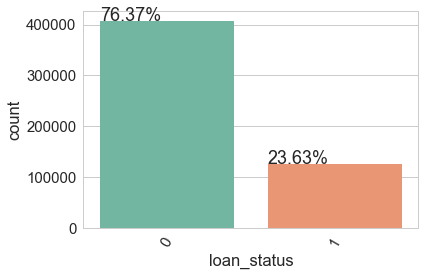

In [409]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
total = float(len(loan_dataset.index))
ax = sns.countplot(x="loan_status", data=loan_dataset, palette="Set2");
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+18, '%2.2f'%(height*100/total)+"%")
plt.xticks(rotation=60)
plt.show()

# 3. Limit Number of features


The full dataset has 45 features for each loan. We'll select features based on following approach

1. Drop features with more than 30% of their data missing.
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.(For eg features that represent data from future (after loan is secured) will be removed)

## 3.1 Drop Features missing more than 30% of data

In [410]:
missing_feature_data = loan_dataset.isnull().mean().sort_values(ascending=False)

In [411]:
missing_feature_data.head(10)

verification_status_joint      0.999427
desc                           0.858011
mths_since_last_record         0.845758
mths_since_last_major_derog    0.750239
mths_since_last_delinq         0.511908
batch_enrolled                 0.159926
tot_coll_amt                   0.078891
total_rev_hi_lim               0.078891
tot_cur_bal                    0.078891
emp_title                      0.057910
dtype: float64

Distribution of missing data percentages

Text(0,0.5,'Feature count')

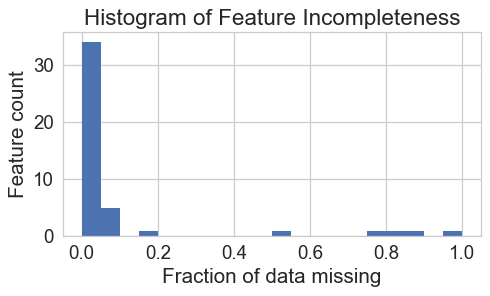

In [412]:
plt.figure(figsize=(6,3), dpi=90)
missing_feature_data.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

It will be difficult to impute data if it's missing more than 30% of values.Hence we can drop the same

In [413]:
drop_list = sorted(list(missing_feature_data[missing_feature_data > 0.3].index))
print(drop_list)

['desc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'verification_status_joint']


In [414]:
loan_dataset.drop(labels=drop_list, axis=1, inplace=True)

In [415]:
loan_dataset.shape

(532428, 40)

## 3.1 Only Keep data available at the time of prediction and remove data leaked from future


In [416]:
print(sorted(loan_dataset.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'batch_enrolled', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'int_rate', 'last_week_pay', 'loan_amnt', 'loan_status', 'member_id', 'open_acc', 'pub_rec', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'total_rev_hi_lim', 'verification_status', 'zip_code']


In [417]:
keep_list = ['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type','collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'int_rate', 'loan_amnt', 'loan_status', 'open_acc', 'pub_rec', 'purpose','revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_rev_hi_lim', 'verification_status', 'zip_code']

In [418]:
len(keep_list)

30

In [419]:
drop_list = [col for col in loan_dataset.columns if col not in keep_list]
print(drop_list)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'batch_enrolled', 'pymnt_plan', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_week_pay']


In [420]:
len(drop_list)


10

Drop these feaures

In [421]:
loan_dataset.drop(labels=drop_list, axis=1, inplace=True)

In [422]:
loan_dataset.shape

(532428, 30)

# 4. Pre-processing and Exploratory Analysis


Inspect each feature individually, and do the following:

1. Drop the feature if it is not useful for predicting the loan status.
2. View summary statistics and visualize the data, plotting against the loan status.
3. Modify the feature to make it useful for modeling, if necessary.

In [423]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loan_dataset.loc[loan_dataset[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loan_dataset[col_name], order=sorted(loan_dataset[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    
    if continuous:
        loan_dataset.boxplot(column=col_name,by='loan_status', ax=ax2)
        plt.title("Boxplot  loan_status vs " + col_name)
        plt.suptitle("")   
    else:
        charge_off_rates = loan_dataset.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,1]
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Defaulted')                   
        ax2.set_title('Loan Defaults by ' + full_name)
        ax2.set_xlabel(full_name)
    plt.tight_layout()

In [424]:
print(list(loan_dataset.columns))

['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']


## 4.1 loan_amnt

From Data Dictionary: Loan amount ($) applied by the member

In [425]:
loan_dataset['loan_amnt'].describe()

count    532428.000000
mean      14757.595722
std        8434.420080
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

Loan amounts range from \$500 to \$35,000, with a median of \$13,000.

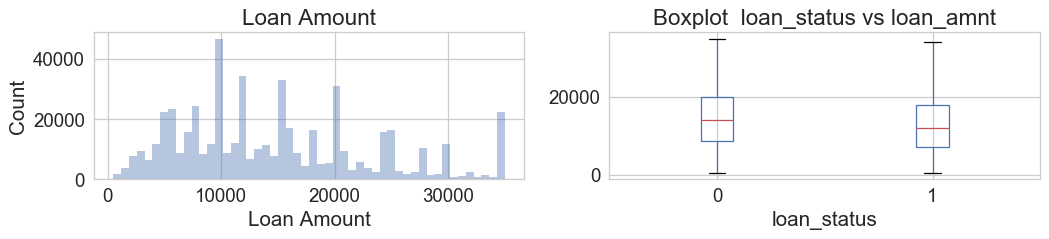

In [426]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

Defaulted loans have lower loan amounts. Let's compare the summary statistics by loan status:

In [427]:
loan_dataset.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,15206.679337,8499.937514,500.0,8700.0,14000.0,20000.0,35000.0
1,125827.0,13306.413965,8049.663290,500.0,7125.0,12000.0,18000.0,35000.0


## 4.2 term

From Data Dictionary: Term of loan (in months)

In [428]:
loan_dataset['term'].value_counts(dropna=False)

36 months    372793
60 months    159635
Name: term, dtype: int64

In [429]:
loan_dataset['term'] = loan_dataset['term'].apply(lambda s: np.int8(s.split()[0]))

In [430]:
loan_dataset['term'].value_counts(normalize=True)

36    0.700175
60    0.299825
Name: term, dtype: float64

In [431]:
loan_dataset.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,1]

term
36    0.272733
60    0.151308
Name: loan_status, dtype: float64

Loans with three-year periods are almost twice as likely to default as loans with five-year periods.

## 4.3 int_rate

From Data Dictionary: Interest rate (%) on loan

In [432]:
loan_dataset['int_rate'].describe()

count    532428.000000
mean         13.242969
std           4.379611
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

Interest rates range from 5.32% to 28.99% (!) with a median of 12.99%.

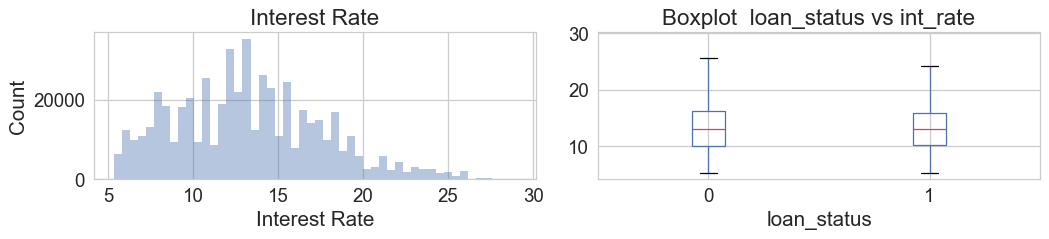

In [433]:
plot_var('int_rate', 'Interest Rate', continuous=True)

In [434]:
loan_dataset.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,13.236660,4.418598,5.32,9.99,12.99,16.29,28.99
1,125827.0,13.263356,4.251138,5.32,10.16,13.11,15.80,28.99


Not much of a difference in interest rate between loans that defaulted and not

## 4.4 grade, sub_grade

* Data Dictionary for grade:  Grade assigned by the bank.
* Data Dictionary for sub_grade:  Grade assigned by the bank.
* Let us list possible values of `grade` and `sub_grade`?

In [435]:
print(sorted(loan_dataset['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [436]:
print(sorted(loan_dataset['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Grade is implied in subgrade and hence having grade is redundant.So let us drop it

In [437]:
loan_dataset.drop('grade', axis=1, inplace=True)

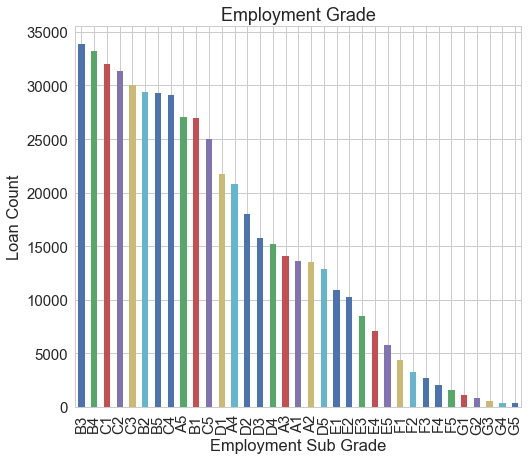

In [438]:
a4_dims = (8, 7)
fig, ax = plt.subplots(figsize=a4_dims)
loan_dataset['sub_grade'].value_counts().plot(kind='bar',title = 'Employment Grade',ax=ax)
plt.xlabel('Employment Sub Grade');
plt.ylabel('Loan Count');

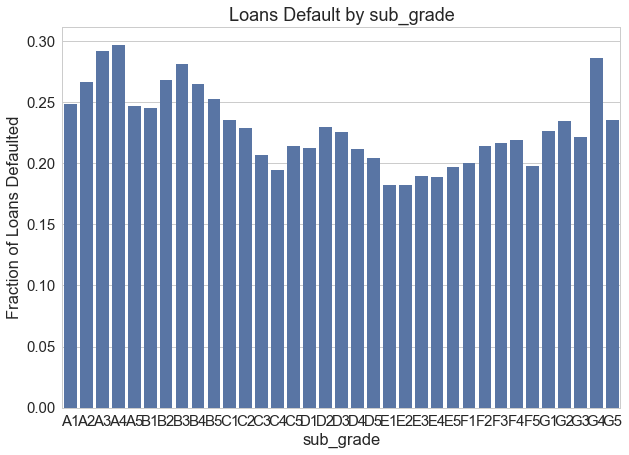

In [439]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_ylabel('Fraction of Loans Defaulted')
ax.set_title('Loans Default by sub_grade')
charge_off_rates = loan_dataset.groupby('sub_grade')['loan_status'].value_counts(normalize=True).loc[:,1]
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1,ax=ax)


There's no clear trend of Loan  default based on subgrade

## 4.5 emp_title


Data Dictionary: "The job / Employer title of member."

In [440]:
loan_dataset['emp_title'].describe()

count      501595
unique     190124
top       Teacher
freq         8280
Name: emp_title, dtype: object

Too many uniq employee titles for this feature to be useful, so we drop it.

In [441]:
loan_dataset.drop(labels='emp_title', axis=1, inplace=True)

## 4.6 emp_length

Data Dictionary: Employment length, where 0 means less than one year and 10 means ten or more years

In [442]:
loan_dataset['emp_length'].value_counts(dropna=False).sort_index()

1 year        34202
10+ years    175105
2 years       47276
3 years       42175
4 years       31581
5 years       33393
6 years       25741
7 years       26680
8 years       26443
9 years       20688
< 1 year      42253
NaN           26891
Name: emp_length, dtype: int64

We have 26891 loans without valid data

In [443]:
loan_dataset['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [444]:
loan_dataset['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [445]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [446]:
loan_dataset['emp_length'] = loan_dataset['emp_length'].apply(emp_length_to_int)

In [447]:
loan_dataset['emp_length'].value_counts(dropna=False).sort_index()

 0.0      42253
 1.0      34202
 2.0      47276
 3.0      42175
 4.0      31581
 5.0      33393
 6.0      25741
 7.0      26680
 8.0      26443
 9.0      20688
 10.0    175105
NaN       26891
Name: emp_length, dtype: int64

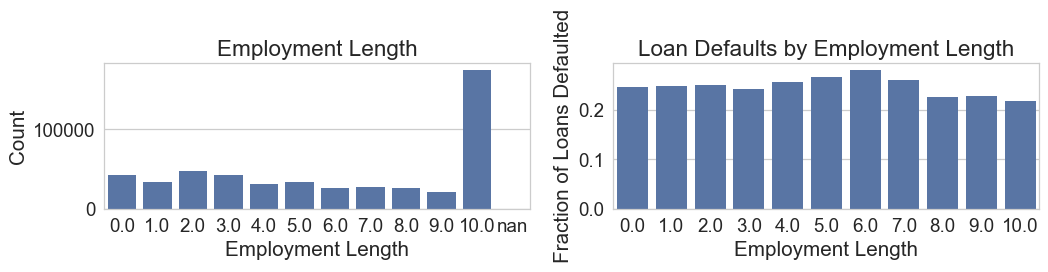

In [448]:
plot_var('emp_length', 'Employment Length', continuous=False)

More loans were given to people who have over 10 years of employement. There has been slight drop in loan defaults for people having more than 8 years of employment.

## 4.7 home_ownership

From Data Dictionary: Status of home ownership

In [449]:
loan_dataset['home_ownership'].value_counts(dropna=False)

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64

Replace the values `ANY` and `NONE` with `OTHER`:

In [450]:
loan_dataset['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

loan_dataset['home_ownership'].value_counts(dropna=False)

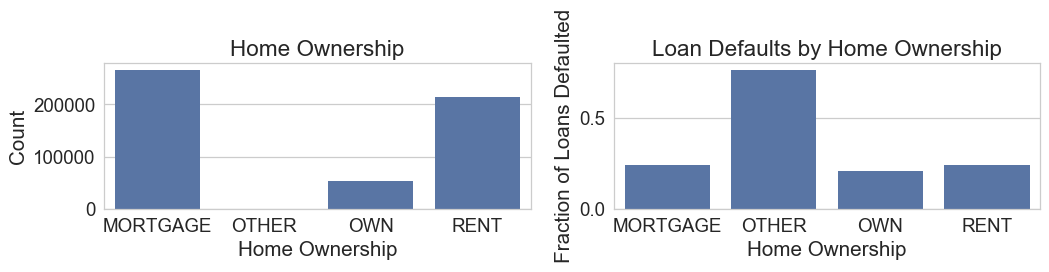

In [451]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be large difference in default by home ownership status. Other category have a higher probability of default. Let's compare the default rate:

In [452]:
loan_dataset.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,1]

home_ownership
MORTGAGE    0.239137
OTHER       0.762821
OWN         0.207485
RENT        0.239554
Name: loan_status, dtype: float64

Loans with "Other" Home ownership category tend to default more than 3 times compared to other categories. On the other hand number of loans issued to Other categories is less and hence may be a anomaly

## 4.8 annual_inc


Data Dictionary: "Annual income ($) reported by the member."

In [453]:
loan_dataset['annual_inc'].describe().apply(lambda x: format(x, 'f'))


count     532425.000000
mean       75029.843289
std        65199.845014
min         1200.000000
25%        45000.000000
50%        65000.000000
75%        90000.000000
max      9500000.000000
Name: annual_inc, dtype: object

Annual income ranges from \$1200 to \$9,500,000, with a median of \$65,000. Because of the large range of incomes, we should take a log transform of the annual income variable.

In [454]:
loan_dataset['log_annual_inc'] = loan_dataset['annual_inc'].apply(lambda x: np.log10(x+1))

In [455]:
loan_dataset.drop('annual_inc', axis=1, inplace=True)

In [456]:
loan_dataset['log_annual_inc'].describe()

count    532425.000000
mean          4.809835
std           0.229353
min           3.079543
25%           4.653222
50%           4.812920
75%           4.954247
max           6.977724
Name: log_annual_inc, dtype: float64

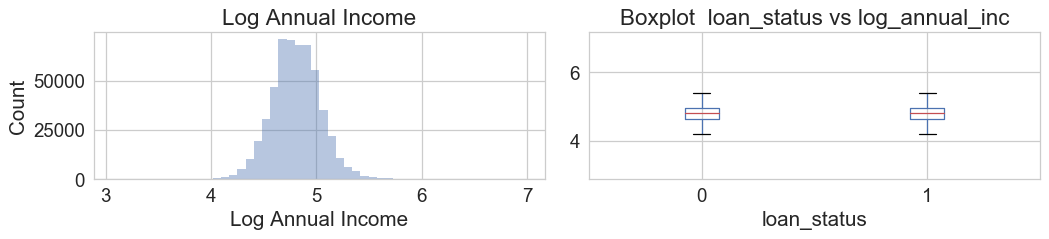

In [457]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [458]:
loan_dataset.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,4.810813,0.230341,3.079543,4.653222,4.812920,4.954247,6.977724
1,125824.0,4.806676,0.226102,3.278067,4.653222,4.806187,4.954247,6.785330


Not much difference in loan defaults based on log_annual_inc

## 4.9 verification_status

Data Dictionary: Status of income verified by the bank.

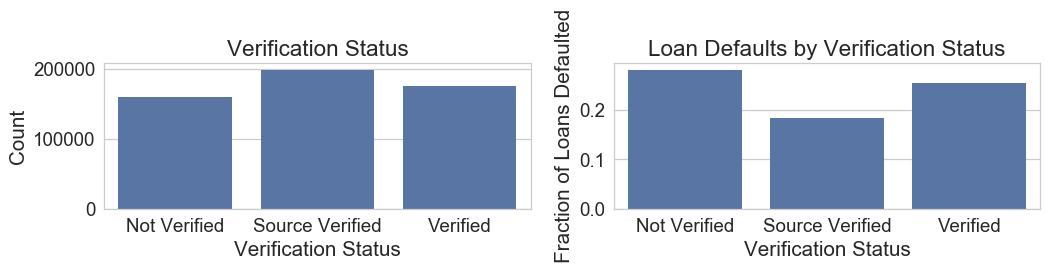

In [459]:
plot_var('verification_status', 'Verification Status', continuous=False)

Source Verified tend to have lower defaults compared to other categories

## 4.10 purpose

Data Dictionary: Purpose of Loan

In [460]:
loan_dataset['purpose'].value_counts()

debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
small_business          6146
car                     5266
medical                 5117
moving                  3243
vacation                2812
house                   2170
wedding                 1401
renewable_energy         331
educational              260
Name: purpose, dtype: int64

In [461]:
loan_dataset.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

purpose
credit_card           0.206162
debt_consolidation    0.231840
home_improvement      0.248625
medical               0.271839
other                 0.272220
vacation              0.273826
moving                0.300956
major_purchase        0.318456
small_business        0.332574
car                   0.367262
renewable_energy      0.371601
house                 0.383410
wedding               0.743041
educational           0.792308
Name: loan_status, dtype: float64

20% of the credit card loan and 23% of the debt_consolidation resulted in defaults.On other hand 79% of education loans and 74% of wedding loans turned into default

## 4.11 title

Data Dictionary: "The loan title provided by the Member."

In [462]:
loan_dataset['title'].describe()

count                 532338
unique                 39693
top       Debt consolidation
freq                  248967
Name: title, dtype: object

View top loan titles and frequencies

In [463]:
loan_dataset['title'].value_counts().head(10)

Debt consolidation         248967
Credit card refinancing     98582
Home improvement            24057
Other                       19053
Debt Consolidation           9932
Major purchase               7195
Medical expenses             3997
Business                     3962
Consolidation                3354
Car financing                3333
Name: title, dtype: int64

There are 39,693 different titles in the dataset, and based on the top  titles, the `purpose` variable appears to already contain this information. So we drop the `title` variable.

In [464]:
loan_dataset.drop('title', axis=1, inplace=True)

## 4.12 zip_code, addr_state


Data Dictionary for `zip_code`: "First three digits of area zipcode of member"

Data Dictionary for `addr_state`: "Living state of member."

In [465]:
loan_dataset['zip_code'].sample(5)

170000    554xx
75928     430xx
125713    080xx
416307    442xx
366769    911xx
Name: zip_code, dtype: object

In [466]:
loan_dataset['zip_code'].nunique()

917

In [467]:
loan_dataset['addr_state'].sample(5)

232067    VA
368253    MA
416184    CT
342333    NC
474685    MD
Name: addr_state, dtype: object

In [468]:
loan_dataset['addr_state'].nunique()

51

There are 917 zip codes and 51 states.Since there are a lot of different zip codes, so let's just keep the state column.

In [469]:
loan_dataset.drop(labels='zip_code', axis=1, inplace=True)

In [470]:
loan_dataset.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

addr_state
ND    0.017606
ME    0.024691
NE    0.026798
MS    0.089286
TN    0.149162
IN    0.155423
OK    0.207630
MI    0.212272
VT    0.212806
OH    0.213916
AR    0.217402
PA    0.217456
IL    0.218345
DE    0.219577
KS    0.219593
AL    0.221078
CT    0.223282
WI    0.225291
KY    0.225486
SC    0.226820
NM    0.227181
MO    0.227454
WV    0.228298
LA    0.229537
TX    0.229619
NC    0.230624
MN    0.230657
FL    0.231360
GA    0.233287
RI    0.234281
NJ    0.235885
NY    0.236567
NH    0.240654
MD    0.240783
NV    0.242846
WY    0.246244
SD    0.247479
AZ    0.249188
VA    0.249716
MA    0.252887
MT    0.253074
CO    0.255586
OR    0.257291
WA    0.259259
AK    0.266716
HI    0.269131
UT    0.275790
CA    0.277984
DC    0.309411
ID    0.571429
IA    0.714286
Name: loan_status, dtype: float64

After Calculating the default rates by address state we find that North Dakota (ND) has the lowest default rate  and Iowa(IA) has the highest default rate. Alos we see Idaho(ID) has significant number of defaults





## 4.13 dti


Data Dictionary: Ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income

In [471]:
loan_dataset['dti'].describe()

count    532428.000000
mean         18.138767
std           8.369074
min           0.000000
25%          11.930000
50%          17.650000
75%          23.950000
max         672.520000
Name: dti, dtype: float64

Note sure if the values of 0 and 672 are correct


There are several outliers that mess up our default plots. Plot a histogram for `dti` less than 60:

Text(0.5,1,'Debt-to-income Ratio')

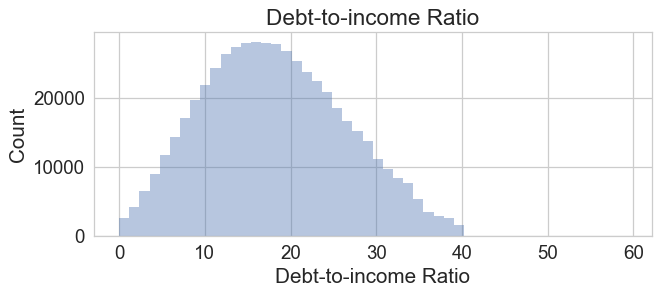

In [472]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loan_dataset.loc[loan_dataset['dti'].notnull() & (loan_dataset['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

Let us check the dti values above 60

In [473]:
(loan_dataset['dti']>=60).sum()

17

Very less dti values above 60.Let us Compare the summary statistics by loan status:

In [474]:
loan_dataset.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,18.762716,8.469814,0.0,12.46,18.29,24.73,672.52
1,125827.0,16.122518,7.696557,0.0,10.40,15.74,21.46,57.14


Loans that defaulted tend to have lower debt-to-income ratios.

## 4.14 delinq_2yrs

Data Dictionary: Number of 30+ days delinquency in past 2 years

Text(0.5,1,'Number of delinquency in past 2yrs')

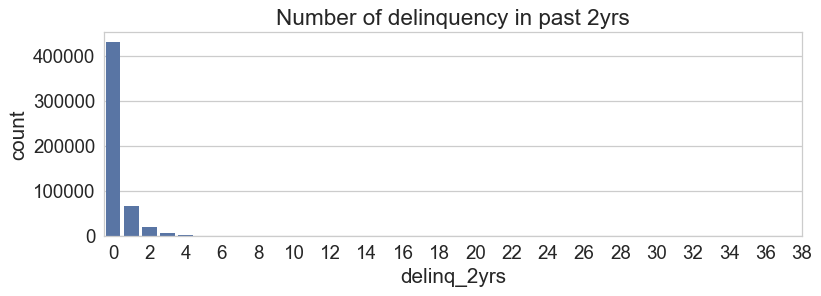

In [475]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loan_dataset['delinq_2yrs'], order=sorted(loan_dataset['delinq_2yrs'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 40, 2), np.arange(0, 40, 2))
plt.title('Number of delinquency in past 2yrs')

In [476]:
loan_dataset['delinq_2yrs'].describe()

count    532412.000000
mean          0.314448
std           0.860045
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: delinq_2yrs, dtype: float64

In [477]:
(loan_dataset['delinq_2yrs']>=5).sum()

3766

In [478]:
loan_dataset.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406598.0,0.336320,0.896609,0.0,0.0,0.0,0.0,30.0
1,125814.0,0.243765,0.724959,0.0,0.0,0.0,0.0,22.0


No clear trend available between loan_status and delinq_2yrs

## 4.15 inq_last_6mths

Data Dictionary: Number of inquiries in last 6 months

In [479]:
loan_dataset['inq_last_6mths'].describe()

count    532412.000000
mean          0.694603
std           0.997025
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          31.000000
Name: inq_last_6mths, dtype: float64

Text(0.5,1,'Number of inquiries in past 6 months')

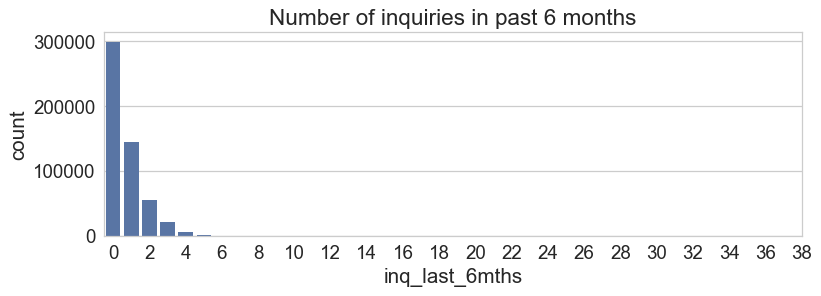

In [480]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loan_dataset['inq_last_6mths'], order=sorted(loan_dataset['inq_last_6mths'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 40, 2), np.arange(0, 40, 2))
plt.title('Number of inquiries in past 6 months')

In [481]:
loan_dataset.groupby('loan_status')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406598.0,0.646164,0.948431,0.0,0.0,0.0,1.0,20.0
1,125814.0,0.851145,1.125834,0.0,0.0,1.0,1.0,31.0


Number of inquiries higher for loans that defaulted 

## 4.16 open_acc

Data Dictionary: "The number of open credit line in member's credit linN"

Text(0.5,1,'Number of Open Credit Lines')

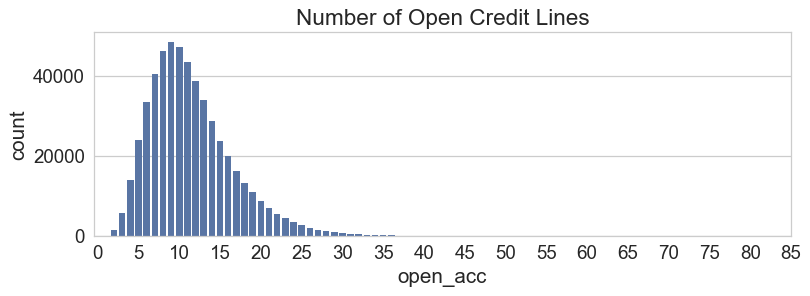

In [482]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loan_dataset['open_acc'], order=sorted(loan_dataset['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

Check for difference in number of credit lines between fully paid loans and charged-off loans?

In [483]:
loan_dataset.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406598.0,11.737783,5.421973,0.0,8.0,11.0,14.0,90.0
1,125814.0,10.924492,4.885944,0.0,7.0,10.0,14.0,58.0


Loans that are defaulted having slightly lower number of open credit lines

## 4.17 pub_rec


Data Dictionary: "Number of derogatory public records"

In [484]:
loan_dataset['pub_rec'].value_counts().sort_index()

0.0     451040
1.0      67938
2.0       8841
3.0       2692
4.0        974
5.0        424
6.0        238
7.0         97
8.0         67
9.0         23
10.0        23
11.0        16
12.0        12
13.0         7
14.0         1
15.0         2
16.0         3
17.0         1
18.0         1
20.0         1
21.0         4
22.0         1
23.0         1
28.0         1
40.0         1
49.0         1
63.0         1
86.0         1
Name: pub_rec, dtype: int64

Check if there is there a difference in average public records between  paid loans and default loans?

In [485]:
loan_dataset.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406598.0,0.210734,0.622240,0.0,0.0,0.0,0.0,86.0
1,125814.0,0.143553,0.433199,0.0,0.0,0.0,0.0,11.0


## 4.18 revol_bal

Data Dictionary: "Total credit revolving balance."

In [486]:
loan_dataset['revol_bal'].describe().apply(lambda x: format(x, 'f'))

count     532428.000000
mean       16921.280323
std        22423.215835
min            0.000000
25%         6444.000000
50%        11876.000000
75%        20843.000000
max      2568995.000000
Name: revol_bal, dtype: object

In [487]:
loan_dataset['log_revol_bal'] = loan_dataset['revol_bal'].apply(lambda x: np.log10(x+1))

In [488]:
loan_dataset.drop('revol_bal', axis=1, inplace=True)

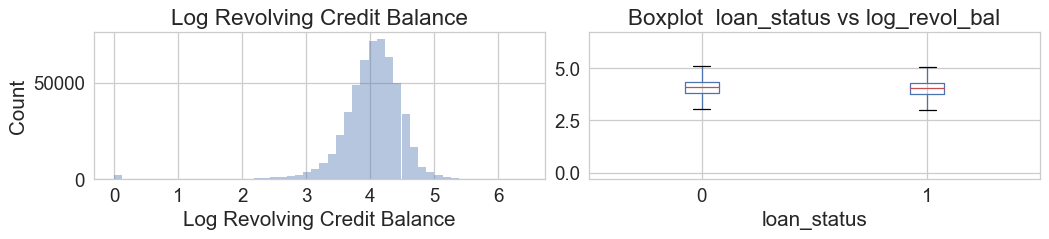

In [489]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

In [490]:
loan_dataset.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,4.048775,0.472137,0.0,3.824841,4.087107,4.330718,6.409763
1,125827.0,3.961524,0.571572,0.0,3.759366,4.033946,4.279142,6.241364


Not much difference in the means.

## 4.19 revol_util

Data Dictionary: "Amount of credit a member is using relative to revol_bal."

In [491]:
loan_dataset['revol_util'].describe()

count    532141.000000
mean         55.057189
std          23.853436
min           0.000000
25%          37.700000
50%          56.000000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64

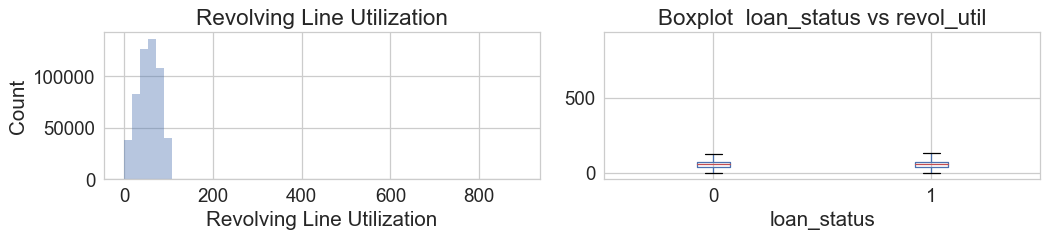

In [492]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [493]:
loan_dataset.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406413.0,55.683349,23.451416,0.0,38.5,56.4,73.8,366.6
1,125728.0,53.033142,25.002015,0.0,34.6,54.3,72.7,892.3


## 4.20 total_acc


Data Dictionary: "The total number of credit lines available in members credit."

Text(0.5,1,'Total Number of Credit Lines')

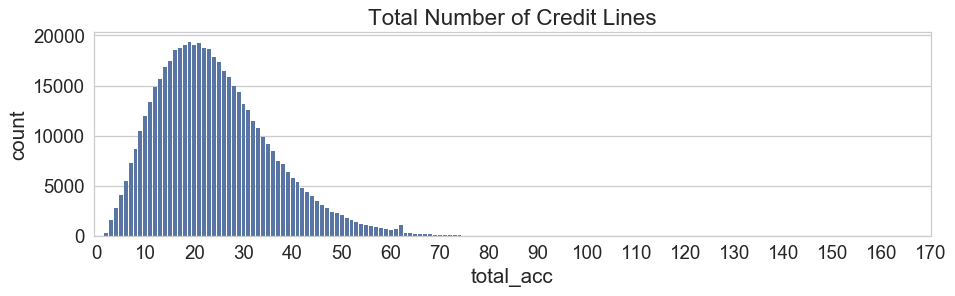

In [494]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(loan_dataset['total_acc'], order=sorted(loan_dataset['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [495]:
loan_dataset.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406598.0,25.284692,11.852684,1.0,17.0,24.0,32.0,162.0
1,125814.0,25.211336,11.812416,1.0,17.0,24.0,32.0,104.0


No significatant difference 

## 4.21 initial_list_status

Data Dictionary: "The initial listing status of the loan. Possible values are – Waiting (W) and Forwarded(F)"

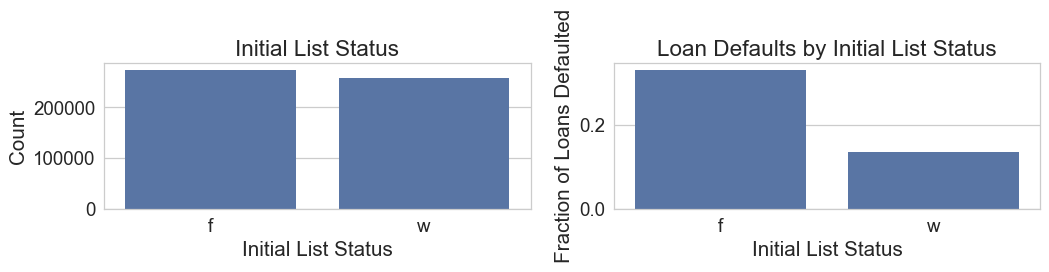

In [496]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

In [497]:
loan_dataset.groupby('initial_list_status')['loan_status'].value_counts(normalize=True).loc[:,1]

initial_list_status
f    0.330993
w    0.135943
Name: loan_status, dtype: float64

Loans which are of Forwarded status tend to default twice more than one's with Waiting status

## 4.22 collections_12_mths_ex_med

Number of collections in last 12 months excluding medical collections"

In [498]:
loan_dataset['collections_12_mths_ex_med'].value_counts().sort_index()

0.0     525346
1.0       6494
2.0        416
3.0         53
4.0         15
5.0          6
7.0          1
14.0         1
16.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [499]:
loan_dataset.groupby('loan_status')['collections_12_mths_ex_med'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406578.0,0.016809,0.144583,0.0,0.0,0.0,0.0,16.0
1,125755.0,0.006187,0.084935,0.0,0.0,0.0,0.0,5.0


## 4.23 application_type


Data Dictionary: "Indicates when the member is an individual or joint."

In [500]:
loan_dataset['application_type'].value_counts()

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64

In [501]:
loan_dataset.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,1]

application_type
INDIVIDUAL    0.236460
JOINT         0.003279
Name: loan_status, dtype: float64

Joint loans are less likely to default when compared to Individual loans

## 4.24 acc_now_delinq

Data Dictionary: "Number of accounts on which the member is delinquent"

In [502]:
loan_dataset['acc_now_delinq'].value_counts().sort_index()

0.0     529949
1.0       2304
2.0        134
3.0         16
4.0          5
5.0          2
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

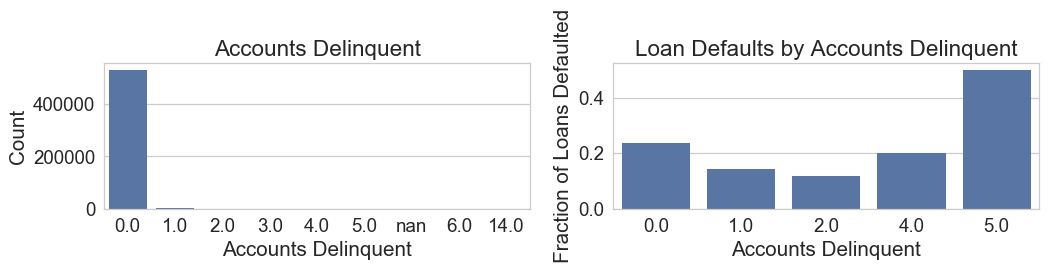

In [503]:
plot_var('acc_now_delinq', 'Accounts Delinquent', continuous=False)

Higher number of deliquent accounts result in more loan default

## 4.25 tot_coll_amt

Data Dictionary: "Total collection amount ever owed"

In [504]:
loan_dataset['tot_coll_amt'].value_counts().sort_index()

0.0         420903
2.0              3
4.0              1
7.0              2
9.0              3
10.0             8
12.0             3
13.0             1
14.0             2
15.0             3
16.0             2
17.0             3
18.0             3
19.0             2
20.0             6
21.0             2
22.0             3
23.0             2
24.0             3
25.0            47
26.0            16
27.0            14
28.0            17
29.0            17
30.0            46
31.0            22
32.0            19
33.0            19
34.0            16
35.0            25
36.0            20
37.0            17
38.0            13
39.0            15
40.0            31
41.0             7
42.0            18
43.0            10
44.0            10
45.0            15
46.0            13
47.0            19
48.0            11
49.0            21
50.0          1053
51.0           197
52.0           199
53.0           214
54.0           242
55.0           327
56.0           208
57.0           204
58.0        

In [505]:
loan_dataset['tot_coll_amt'].describe().apply(lambda x: format(x, 'f'))

count    490424.000000
mean        213.562222
std        1958.571538
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      496651.000000
Name: tot_coll_amt, dtype: object

In [506]:
loan_dataset.groupby('loan_status')['tot_coll_amt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,397921.0,225.994212,2005.794855,0.0,0.0,0.0,0.0,496651.0
1,92503.0,160.083414,1739.881359,0.0,0.0,0.0,0.0,296368.0


## 4.26 tot_cur_bal

Data Dictionary: "Total current balance of all accounts"

In [507]:
loan_dataset['tot_cur_bal'].describe().apply(lambda x: format(x, 'f'))

count     490424.000000
mean      139554.110792
std       153914.877437
min            0.000000
25%        29839.750000
50%        80669.500000
75%       208479.250000
max      8000078.000000
Name: tot_cur_bal, dtype: object

In [508]:
loan_dataset.groupby('loan_status')['tot_cur_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,397921.0,138472.244599,152845.308501,0.0,29985.0,79103.0,206265.0,4026405.0
1,92503.0,144207.984476,158350.116486,0.0,29190.0,88653.0,217231.5,8000078.0


## 4.27 total_rev_hi_lim

Data Dictionary: "Total revolving credit limit"

In [509]:
loan_dataset['total_rev_hi_lim'].describe().apply(lambda x: format(x, 'f'))

count     490424.000000
mean       32080.572919
std        38053.035312
min            0.000000
25%        14000.000000
50%        23700.000000
75%        39800.000000
max      9999999.000000
Name: total_rev_hi_lim, dtype: object

In [510]:
loan_dataset.groupby('loan_status')['total_rev_hi_lim'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,397921.0,32439.196685,39527.906844,0.0,14000.0,24000.0,40300.0,9999999.0
1,92503.0,30537.877788,30869.111550,0.0,13600.0,22700.0,37900.0,2013133.0


Loans that defaulted have lower total revolving credit limit

# 5. Further Pre-Processing

## 5.1 Check current feature state

In [511]:
loan_dataset.shape

(532428, 26)

List all the columns 

In [512]:
print(loan_dataset.columns)

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_status', 'log_annual_inc', 'log_revol_bal'],
      dtype='object')


Check if any varaibles have missing data

In [513]:
missing_fractions = loan_dataset.isnull().mean().sort_values(ascending=False) 
print(missing_fractions[missing_fractions > 0]) 

total_rev_hi_lim              0.078891
tot_cur_bal                   0.078891
tot_coll_amt                  0.078891
emp_length                    0.050506
revol_util                    0.000539
collections_12_mths_ex_med    0.000178
open_acc                      0.000030
acc_now_delinq                0.000030
delinq_2yrs                   0.000030
inq_last_6mths                0.000030
total_acc                     0.000030
pub_rec                       0.000030
log_annual_inc                0.000006
dtype: float64


In [514]:
loan_dataset.drop('addr_state', axis=1, inplace=True)
loan_dataset.drop('log_annual_inc', axis=1, inplace=True)
loan_dataset.drop('log_revol_bal', axis=1, inplace=True)


In [515]:
loan_dataset.shape

(532428, 23)

In [516]:
loan_dataset_test = pd.read_csv('test_indessa.csv')
loan_dataset_test.shape

(354951, 44)

In [517]:
loan_dataset_test = loan_dataset_test[['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim']]



In [518]:
loan_dataset_test['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
loan_dataset_test['emp_length'].replace('< 1 year', '0 years', inplace=True)
loan_dataset_test['emp_length'] = loan_dataset_test['emp_length'].apply(emp_length_to_int)
loan_dataset_test['emp_length'].value_counts(dropna=False).sort_index()
loan_dataset_test['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)
loan_dataset_test['term'] = loan_dataset_test['term'].apply(lambda s: np.int8(s.split()[0]))
loan_dataset_test['tot_cur_bal'].describe().apply(lambda x: format(x, 'f'))

count     326679.000000
mean      139314.188087
std       153502.186643
min            0.000000
25%        29873.500000
50%        80369.000000
75%       207800.500000
max      4447397.000000
Name: tot_cur_bal, dtype: object

In [519]:
print(loan_dataset_test.columns)

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')


In [520]:
loan_dataset = pd.get_dummies(loan_dataset, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose','initial_list_status', 'application_type'], drop_first=True)

In [521]:
loan_dataset.shape

(532428, 71)

In [522]:
loan_dataset.sample(5)

,loan_amnt,term,int_rate,emp_length,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
523904,19950,60,19.19,2.0,25.61,0.0,0.0,16.0,0.0,51.0,16.0,0.0,0.0,0.0,40934.0,19200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
72288,5700,36,18.25,NaN,13.50,0.0,0.0,3.0,0.0,81.7,6.0,0.0,0.0,69.0,8389.0,1800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
293660,15000,36,12.99,3.0,24.13,3.0,0.0,11.0,0.0,64.1,43.0,0.0,0.0,0.0,259880.0,17900.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
132245,5825,36,14.27,4.0,20.21,0.0,1.0,9.0,0.0,74.8,17.0,0.0,0.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23831,4000,36,13.33,6.0,17.91,0.0,0.0,4.0,0.0,3.2,5.0,0.0,0.0,1134.0,8024.0,10700.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [523]:
loan_dataset_test = pd.get_dummies(loan_dataset_test, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose','initial_list_status', 'application_type'], drop_first=True)

In [524]:
loan_dataset_test.shape

(354951, 70)

In [525]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_status', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',

In [526]:
loan_dataset_test.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_

## 5.2 Train/test split

In [527]:
from sklearn.model_selection import train_test_split

dependentColumn = ['loan_status']
X_train, X_test = train_test_split(loan_dataset, test_size=0.2,random_state=0)
X_train=pd.DataFrame(X_train,columns=loan_dataset.columns)
X_test=pd.DataFrame(X_test,columns=loan_dataset.columns)

y_train = pd.DataFrame(X_train[dependentColumn],columns=dependentColumn) 
y_test = pd.DataFrame(X_test[dependentColumn],columns=dependentColumn) 
X_train.drop('loan_status', axis=1, inplace=True)
X_test.drop(dependentColumn, axis=1, inplace=True)

X_test.head()


,loan_amnt,term,int_rate,emp_length,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
410253,5000,36,13.66,1.0,11.47,0.0,1.0,14.0,0.0,13.9,17.0,0.0,0.0,0.0,23756.0,12800.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3662,5800,36,14.33,2.0,3.32,1.0,0.0,8.0,0.0,30.8,20.0,0.0,0.0,0.0,4901.0,15900.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207553,6000,36,9.99,NaN,34.35,2.0,0.0,7.0,1.0,69.8,18.0,0.0,0.0,0.0,284655.0,6500.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12488,16500,60,12.29,3.0,4.08,2.0,0.0,13.0,0.0,7.9,30.0,0.0,0.0,0.0,233143.0,5400.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
324791,29900,60,17.57,5.0,30.59,1.0,0.0,14.0,0.0,75.8,42.0,0.0,0.0,0.0,203017.0,45600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# 6. Linear Dependence of Loan default on the Predictors

On the training set, we compute the Pearson correlation, $F$-statistic, and $p$ value of each predictor with the response variable `charged_off`.

In [528]:
linear_dep = pd.DataFrame()

Pearson correlations:

In [529]:
print(X_train.columns.values)



['loan_amnt' 'term' 'int_rate' 'emp_length' 'dti' 'delinq_2yrs'
 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_util' 'total_acc'
 'collections_12_mths_ex_med' 'acc_now_delinq' 'tot_coll_amt'
 'tot_cur_bal' 'total_rev_hi_lim' 'sub_grade_A2' 'sub_grade_A3'
 'sub_grade_A4' 'sub_grade_A5' 'sub_grade_B1' 'sub_grade_B2'
 'sub_grade_B3' 'sub_grade_B4' 'sub_grade_B5' 'sub_grade_C1'
 'sub_grade_C2' 'sub_grade_C3' 'sub_grade_C4' 'sub_grade_C5'
 'sub_grade_D1' 'sub_grade_D2' 'sub_grade_D3' 'sub_grade_D4'
 'sub_grade_D5' 'sub_grade_E1' 'sub_grade_E2' 'sub_grade_E3'
 'sub_grade_E4' 'sub_grade_E5' 'sub_grade_F1' 'sub_grade_F2'
 'sub_grade_F3' 'sub_grade_F4' 'sub_grade_F5' 'sub_grade_G1'
 'sub_grade_G2' 'sub_grade_G3' 'sub_grade_G4' 'sub_grade_G5'
 'home_ownership_OTHER' 'home_ownership_OWN' 'home_ownership_RENT'
 'verification_status_Source Verified' 'verification_status_Verified'
 'purpose_credit_card' 'purpose_debt_consolidation' 'purpose_educational'
 'purpose_home_improvement' 'purpose_house' 'pu

In [120]:
#Not able to do Pearson correlations calculation as i get out of memory errors

# 7. Train Model and Testing


In [543]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
import parfit.parfit as pf
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix




pipeline_test = Pipeline([
    ('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False))    
])

X_test_impute_scaled =pipeline_test.fit_transform(X_test)
X_train_impute_scaled =pipeline_test.fit_transform(X_train)
X_test_set_impute_scaled =pipeline_test.fit_transform(loan_dataset_test)



In [544]:
print(X_train_impute_scaled.shape,X_test_impute_scaled.shape,X_test_set_impute_scaled.shape)

(425942, 70) (106486, 70) (354951, 70)


## 7.1 Light GBM


In [121]:
pipeline_lgb = Pipeline([
    ('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', lgb.LGBMRegressor(num_leaves=31))
])


In [122]:
import lightgbm as lgb
from sklearn import metrics


lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_



Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 31.5min finished
D:\dev\software\IDE\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\dev\software\IDE\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=25, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=300, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [123]:
grid_search.best_score_


0.8455015138636858

In [124]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [127]:
pipeline_lgb_test = Pipeline([
    ('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False))    
])

X_test_impute_scaled =pipeline_lgb_test.fit_transform(X_test)

In [129]:
from sklearn.metrics import roc_auc_score

y_score = grid_search.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)

0.640297582270536

## 7.2 Logistic regression with SGD training

In [131]:
from sklearn.linear_model import SGDClassifier
pipeline_sgdlogreg = Pipeline([
    ('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [133]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [135]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [136]:
grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   47.1s finished
D:\dev\software\IDE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       e...ty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=0.001, verbose=0, warm_start=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'model__alpha': [1e-05, 0.01, 10], 'model__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

In [138]:
grid_sgdlogreg.best_score_

0.7446858716596837

In [139]:
grid_sgdlogreg.best_params_

{'model__alpha': 1e-05, 'model__penalty': 'l1'}

In [140]:
y_score = grid_sgdlogreg.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)

0.5003908855129359

## 7.3 Random forest classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rfc = Pipeline([
    ('imputer', Imputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [142]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

In [143]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [144]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.2s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
D:\dev\software\IDE\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_im...stimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'model__n_estimators': [50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='roc_auc', verbose=1)

In [145]:
grid_rfc.best_score_

0.7921396257848778

In [146]:
grid_rfc.best_params_

{'model__n_estimators': 50}

In [147]:
y_score = grid_rfc.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)

0.5045410923860684

## 7.4 Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(Imputer(copy=False), StandardScaler(copy=False),LogisticRegression())
param_grid_clf = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]}



grid_search_clf = GridSearchCV(pipe,param_grid=param_grid_clf,
                                 cv=2,
                                 refit=True,
                                 verbose=10, n_jobs=-1)




In [139]:
grid_search_clf.fit(X_train, y_train.values.ravel())

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   23.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:   27.1s remaining:   38.0s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   30.6s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   33.6s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   40.8s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_i...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [141]:
grid_search_clf.best_score_

0.7852806250616281

In [144]:
grid_search_clf.best_params_

{'logisticregression__C': 100}

In [148]:
y_score = grid_search_clf.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)

0.5549335593007897

In [ ]:
import xgboost as xgb

xgbmodel = xgb.XGBClassifier()
param_dist_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search_xgb = GridSearchCV(xgbmodel, param_grid=param_dist_xgb, cv = 3, 
                                
                               
                   
                               verbose=10, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train.values.ravel())


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 87.4min


## Choose best Random forest model

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done  65 out of  72 | elapsed: 46.4min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 49.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.4min finished


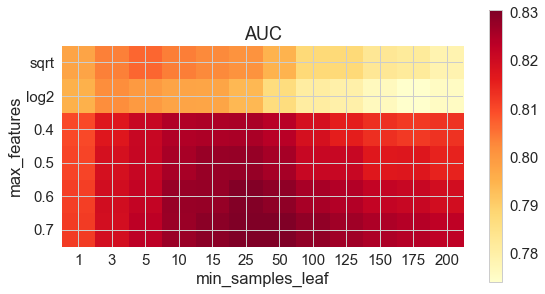

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [532]:
X_train_impute_scaled =pipeline_test.fit_transform(X_train)

paramGrid = ParameterGrid({
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [42]
})

best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier(), paramGrid,
                                                    X_train_impute_scaled, y_train, X_test_impute_scaled, y_test, # nfolds=5 [optional, instead of validation set]
                                                    metric=roc_auc_score, greater_is_better=True, 
                                                    scoreLabel='AUC')


print(best_model)

## Random forest with hyper params tuned

In [533]:
print(best_score)

0.8304909463063366


In [534]:
y_score = best_model.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)

0.8304909463063366

In [535]:
def plot_cm(y_test,y_score):
    cm= confusion_matrix(y_test,y_score.round())
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-defaulter','defaulter']); ax.yaxis.set_ticklabels(['non-defaulter', 'defaulter']);

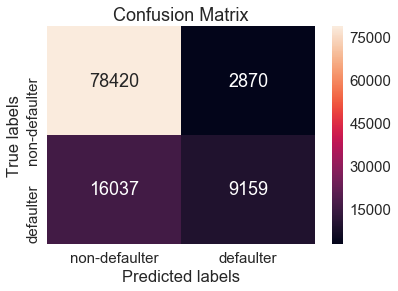

In [536]:
plot_cm(y_test,y_score)

In [537]:
def plot_roc_auc(actual, preds):
    fpr, tpr, thresholds = roc_curve(actual, preds)
    plt.plot(fpr, tpr,'r')
    plt.plot([0,1],[0,1],'b')
    plt.title('AUC: {}'.format(auc(fpr,tpr)))
    plt.show()


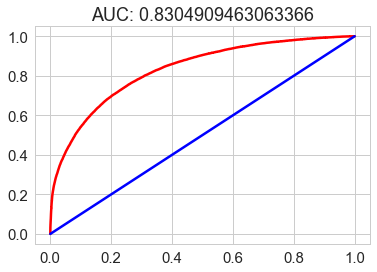

In [538]:
plot_roc_auc(y_test, y_score)


In [545]:
y_score_test = best_model.predict(X_test_set_impute_scaled)

In [547]:
np.savetxt('D:/dev/work/work-ml/home-credit/prediction_test.csv',y_score_test,delimiter=',')


## Choose best Logistic Regression with SGD Model

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  5.1min remaining: 15.4min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  5.1min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  5.1min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  5.2min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  5.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s finished


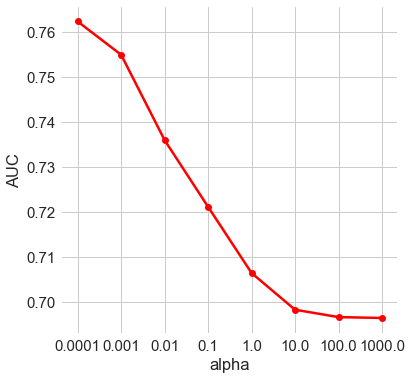

In [155]:
from sklearn.linear_model import SGDClassifier

paramGrid = ParameterGrid({
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
})


best_model, best_score, all_models, all_scores = pf.bestFit(SGDClassifier(), paramGrid,
                                                    X_train_impute_scaled, y_train, X_test_impute_scaled, y_test, # nfolds=5 [optional, instead of validation set]
                                                    metric=roc_auc_score, greater_is_better=True, 
                                                    scoreLabel='AUC')

In [168]:
print(best_model, best_score)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=1000,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False) 0.7623158482276905


In [175]:
y_score = best_model.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)


0.7623158482276905

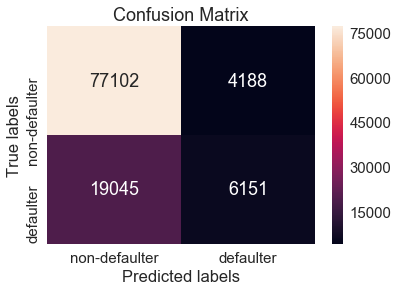

In [176]:
plot_cm(y_test,y_score)

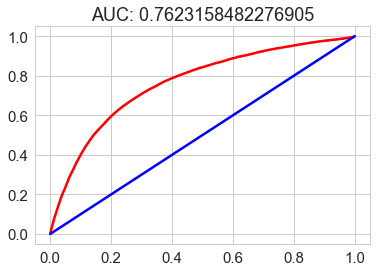

In [177]:
plot_roc_auc(y_test, y_score)


## Light GBM after tuning

In [197]:
params = {
        'task': 'train',
        'boosting_type':                                                                  tuim cv 
        'is_training_metric': True,
        'max_bin': 255,
        'learning_rate': 0.1,
        'num_leaves': 63,
        'tree_learner': 'serial',
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_data_in_leaf': 50,
        'min_sum_hessian_in_leaf': 5,
        'is_enable_sparse': True,
        'use_two_round_loading': False,
        'is_save_binary_file': False,
        'output_model': 'LightGBM_model.txt',
        'num_machines': 1,
        'local_listen_port': 12400,
        'machine_list_file': 'mlist.txt',
        'verbose': 0,
        'subsample_for_bin': 200000,
        'min_child_samples': 20,
        'min_child_weight': 0.001,
        'min_split_gain': 0.0,
        'colsample_bytree': 1.0,
        'reg_alpha': 0.0,
        'reg_lambda': 0.0
    }


In [198]:
gridParams = {
    'learning_rate': [ 0.1],
    'num_leaves': [63],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary']
}


In [199]:
lgb_mdl = lgb.LGBMClassifier() 

scoring = {'AUC': 'roc_auc'}


In [200]:
lgm_grid = GridSearchCV(lgb_mdl, gridParams, verbose=2, cv=5, scoring=scoring, n_jobs=-1, refit='AUC')


In [201]:
lgm_grid.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.2s remaining:   40.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1], 'num_leaves': [63], 'boosting_type': ['gbdt'], 'objective': ['binary']},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring={'AUC': 'roc_auc'}, verbose=2)

In [202]:
print('Best parameters:', lgm_grid.best_params_)


Best parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'num_leaves': 63, 'objective': 'binary'}


In [203]:
print('Best score is:', lgm_grid.best_score_)


Best score is: 0.8454279299490283


In [204]:
y_score = lgm_grid.predict_proba(X_test_impute_scaled)[:,1]
roc_auc_score(y_test, y_score)


0.5913080723789288

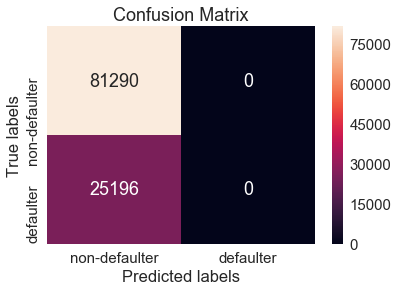

In [205]:
plot_cm(y_test,y_score)

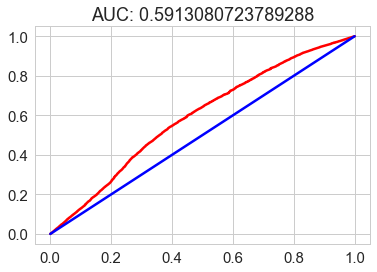

In [206]:
plot_roc_auc(y_test, y_score)

## Logistic Regression

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)



best_model, best_score, all_models, all_scores = pf.bestFit(GradientBoostingClassifier(), gbm_paramGrid,
                                                    X_train_impute_scaled, y_train, X_test_impute_scaled, y_test, # nfolds=5 [optional, instead of validation set]
                                                    metric=roc_auc_score, greater_is_better=True, 
                                                    scoreLabel='AUC')

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 44.4min


In [211]:
print(best_model, best_score)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 0.7628533720163382
